# Digital Signal Processing

### Dimitris Dimos <dimitris.dimos647@gmail.com>
### 031 17 165

### 3rd Set of Analytic Exercises

# Exercise 3.4

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import random

In [3]:
# signal deterministic parameters
N = 128
n = np.linspace(0, N-1, N)
f = np.fft.rfftfreq(N)
w1 = 0.2*np.pi
w2 = 0.3*np.pi


# windows
rectang = signal.windows.boxcar(N)
hamming = np.hamming(N)


# noise parameters
mean = 0
std = 1 


# random signal array
x = []
for i in range(50):
    p1 = random.uniform(0, 2*np.pi)
    p2 = random.uniform(0, 2*np.pi)
    v = np.random.normal(mean, std, size = N)
    x.append(0.1*np.sin(w1*n + p1) + np.sin(w2*n + p2)+v)
    
print(len(x[0]))
print(f,N)

128
[0.        0.0078125 0.015625  0.0234375 0.03125   0.0390625 0.046875
 0.0546875 0.0625    0.0703125 0.078125  0.0859375 0.09375   0.1015625
 0.109375  0.1171875 0.125     0.1328125 0.140625  0.1484375 0.15625
 0.1640625 0.171875  0.1796875 0.1875    0.1953125 0.203125  0.2109375
 0.21875   0.2265625 0.234375  0.2421875 0.25      0.2578125 0.265625
 0.2734375 0.28125   0.2890625 0.296875  0.3046875 0.3125    0.3203125
 0.328125  0.3359375 0.34375   0.3515625 0.359375  0.3671875 0.375
 0.3828125 0.390625  0.3984375 0.40625   0.4140625 0.421875  0.4296875
 0.4375    0.4453125 0.453125  0.4609375 0.46875   0.4765625 0.484375
 0.4921875 0.5      ] 128


### Periodogram

128
65
[ 11.09549637  -1.37220305 -13.68319746   7.5226936   10.70488885
   1.2835004  -14.66928381 -10.45695137   1.77442787 -13.67592712
  -6.23325695 -23.07297053 -16.76184938   9.45459097  -5.41710394
   5.69013328 -11.11915807   9.76401276   7.15072151  28.61889634
  11.15689877   7.80179813   3.21280345  -0.63370337   5.63356373
   9.82687953  -1.79849096   6.08111022 -16.95267465 -19.70448231
   4.57227171  -2.04179648   3.80863671   4.73874878   1.50419749
   2.01161021 -10.9753219   -1.9995105  -19.81987452   7.00099393
  -6.33655024  -1.36569779 -10.36925643   6.35908997  -5.00299371
 -15.11364419  -5.70119433  -3.92492881 -10.47995916 -12.2760459
  -9.17459876  -6.89247241   4.64728001   5.23012197 -29.84430467
  -0.54683734   8.0990883   -7.64841503   2.60791825 -34.41290429
   8.15654374  -9.69131677 -27.31792812 -15.95039942 -24.2786172 ]
[-16.64116196  -3.49888565  -8.63365732  -3.44828198  -6.28536464
  -3.59351413  -5.13749191  -7.32328202  -5.77957585  -4.20023438
  -

Text(0, 0.5, 'Magnitude (dB)')

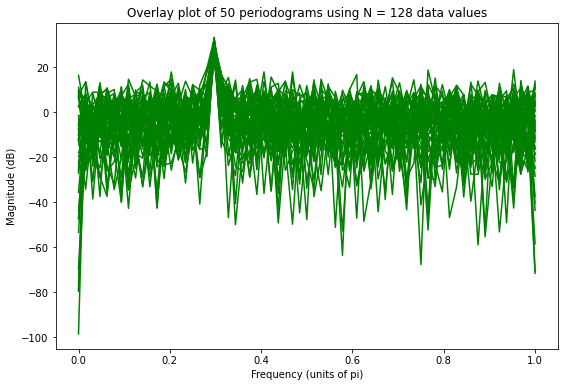

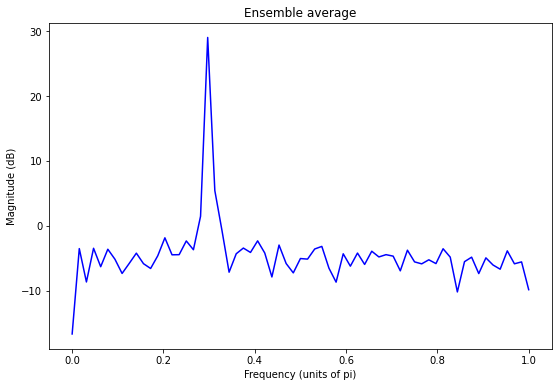

In [5]:
# window the random signals
for i in range(50):
    x[i] *= rectang

print(len(x[1]))    
# create the periodograms
plt.figure(1, figsize = (9,6))
plt.title("Overlay plot of 50 periodograms using N = {0} data values".format(N))
plt.xlabel("Frequency (units of pi)")
plt.ylabel("Magnitude (dB)")

periodogram = []
for i in range(50):
    dft = np.fft.rfft(x[i])
    periodogram.append(20*np.log10((abs(dft)**2)/N))
    plt.plot(2*f, periodogram[i], color = 'green')
print(len(periodogram[0]))
print((periodogram[0]))


# Estimation of statistic mean value

print(mean)
mean = np.mean(periodogram, axis = 0)
plt.figure(2, figsize = (9,6))
plt.plot(2*f, mean, color = 'blue')

plt.title("Ensemble average".format(N))
plt.xlabel("Frequency (units of pi)")
plt.ylabel("Magnitude (dB)")

### Modified Periodogram

Text(0, 0.5, 'Magnitude (dB)')

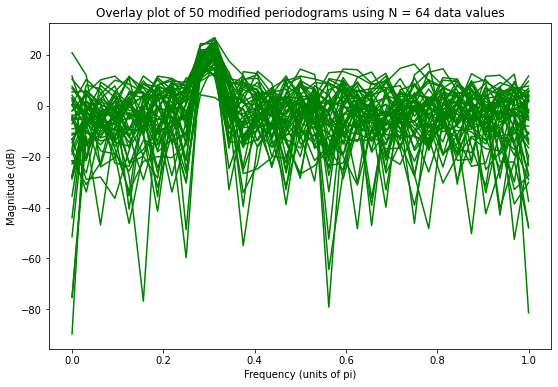

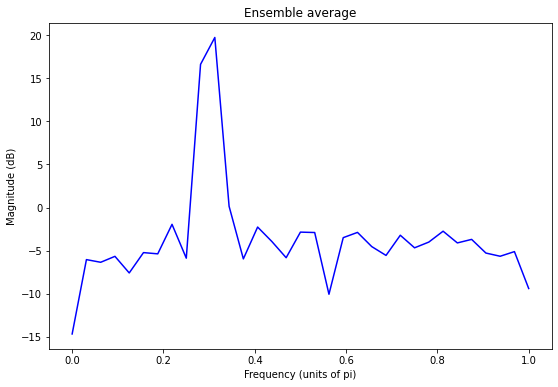

In [4]:
# window the random signals
for i in range(50):
    x[i] *= hamming
    

# hamming window energy
U = (1/N)*np.sum(abs(hamming)**2)
    
# create the modified periodograms
plt.figure(3, figsize = (9,6))
plt.title("Overlay plot of 50 modified periodograms using N = {0} data values".format(N))
plt.xlabel("Frequency (units of pi)")
plt.ylabel("Magnitude (dB)")

mod_periodogram = []
for i in range(50):
    dft = np.fft.rfft(x[i])
    mod_periodogram.append(20*np.log10((abs(dft)**2)/(N*U)))
    plt.plot(2*f, mod_periodogram[i], color = 'green')


# Estimation of statistic mean value
mod_mean = np.mean(mod_periodogram, axis = 0)
plt.figure(4, figsize = (9,6))
plt.plot(2*f, mod_mean, color = 'blue')
plt.title("Ensemble average".format(N))
plt.xlabel("Frequency (units of pi)")
plt.ylabel("Magnitude (dB)")